#### **다중 회귀** 란 여러 개의 특성을 사용한 선형 회귀를 다중 회귀라고 부른다.
#### 특성이 2개면 타킷값과 함께 3차원 공간을 형성하고 선형 회귀 방정식
#### 타킷 = a * 특성1 + b * 특성2 + 절편 

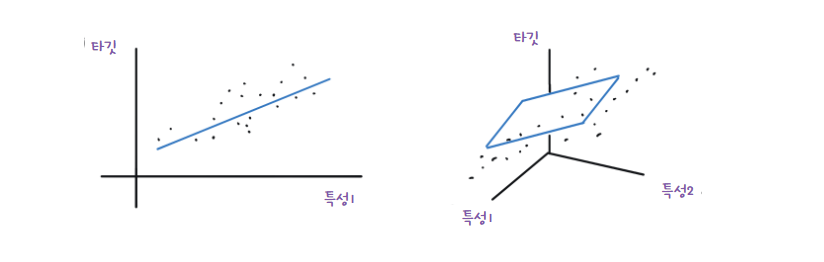

In [1]:
from IPython.display import Image, display
display(Image(filename="img/img28.png", width=800, height=600))

다음 예제 농어의 길이 뿐만 아니라 농어의 높이와 두께도 함께 사용할것인데 
'농어 길이 * 농어 높이' 를 새로운 특성으로 만들자 <br>
이처럼 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성공학** 이라고 부른다.<br>
원본 데이터(raw data)를 머신러닝 알고리즘이 더 잘 학습할 수 있도록 **새로운 특성(feature)**을 만들거나, **기존 특성을 변형/선택**하는 과정을 말합니다.<br>
즉, 모델 성능을 높이기 위해 데이터를 **전처리 + 가공 + 변형**하는 단계

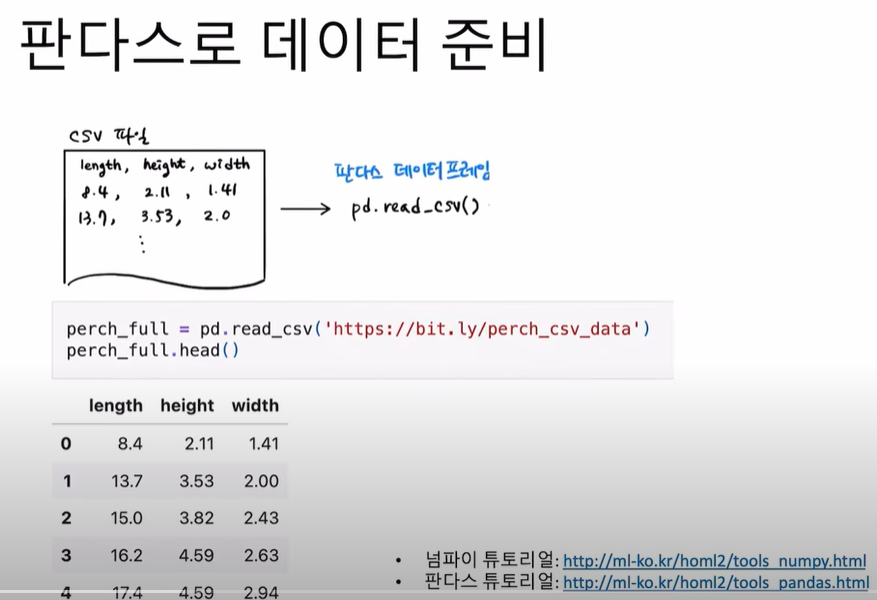

In [2]:
display(Image(filename="img/img29.png", width=800, height=600))
# csv 파일을 판다스로 읽어와 데이터 프레임에 저장 후 넘파일 배렬로 변환

In [3]:
import pandas as pd

In [4]:
df =  pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [5]:
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [6]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(len(perch_weight))

56


In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 사이킷런의 변환기 (다항 특성 만들기)<br>
> 변환기란 특성을 만들거나 전처리하는 클래스

- 사이킷 런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.<br>
- 사이킷런에서 이런 클래스를 변환기 라고 부른다.<br>
- 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

In [8]:
# 우리가 사용할 변환기는 sklearn.preprocessing 패키지에 있는 PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

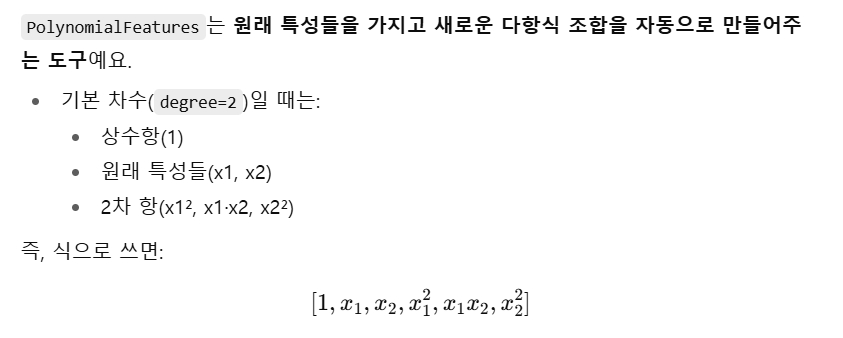

In [9]:
display(Image(filename="img/img30.png", width=800, height=600))

In [10]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])  # 2, 3 은 두개의 특성이다.
print(poly.transform([[2, 3]]))
# ========================
# 결과 [[1. 2. 3. 4. 6. 9.]]
#  1(상수값), 2, 3, 2**2, 2*3, 3**2

[[1. 2. 3. 4. 6. 9.]]


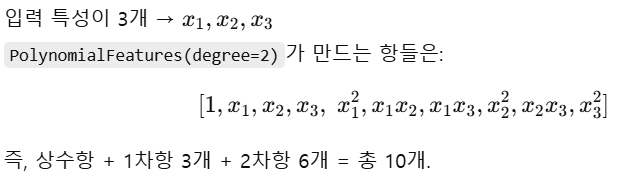

In [11]:
display(Image(filename="img/img31.png", width=800, height=600))

In [12]:
poly = PolynomialFeatures()
poly.fit([[2, 3, 4]])  # 2, 3 은 두개의 특성이다.
print(poly.transform([[2, 3, 4]]))
# ========================
# 결과 [[1. 2. 3. 4. 4. 6. 8. 9. 12. 16.]]


[[ 1.  2.  3.  4.  4.  6.  8.  9. 12. 16.]]


In [13]:
poly = PolynomialFeatures(include_bias=False)
#  훈련 아님 변환기
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [14]:
# 9 개의 특성으로 변환됨
print(train_poly.shape)

(42, 9)


In [15]:
# 9 개의 특성으로 변환됨
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [16]:
test_poly = poly.transform(test_input)

#### 다중 회귀 모델 훈련하기

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [18]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [19]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [20]:
print(train_poly.shape)

(42, 9)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [22]:
print(lr.score(test_poly, test_target))

0.9714559911594155


좀더 다양한 특성을 많이 만들어서 넣자 (훈련세트는 높지만 테스트세트는 안 좋음)

In [23]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [24]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4', 'length^5', 'length^4  height', 'length^4  width',
       'length^3  height^2', 'length^3  height  width',
       'length^3  width^2', 'length^2  height^3',
       'length^2  height^2  width', 'length^2  height  width^2',
       'length^2  width^3', 'length  height^4', 'length  height^3  width',
       'length  height^2

In [25]:
print(train_poly.shape)

(42, 55)


In [26]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [27]:
# 훈련세트에 너무 과대적합 되었음
print(lr.score(test_poly, test_target))

-144.40744532797535


### 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

####  모델이 훈련세트에 과대적합 되지 않도록 만드는 것
#### 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기(기울기)를 작게 만드는 일이다.

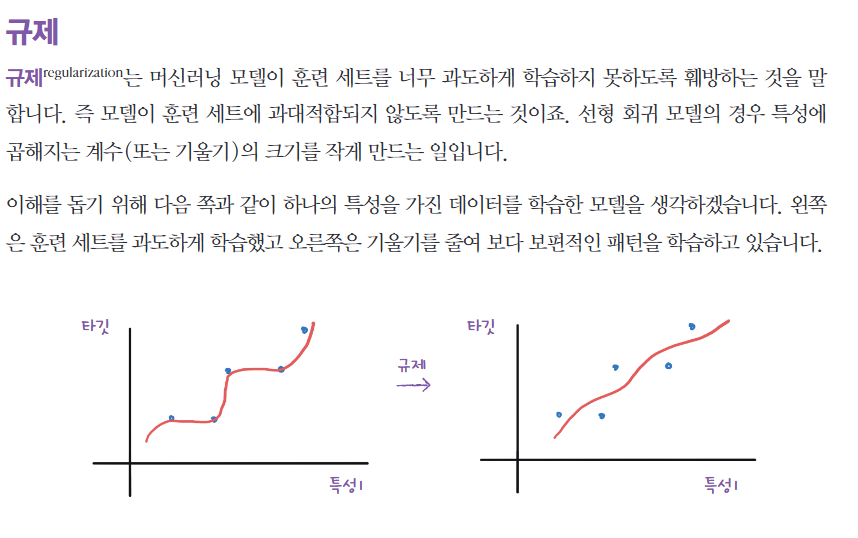

In [28]:
display(Image(filename="img/img31-1.png", width=800, height=600))

- 규제 전에 표준화 계수값의 크기가 서로 많이 다르면 공정하게 제어 되지 않는다. <br>
- 방지 하기 위해서 먼저 정규화를 해야 된다.<br>
- 정규화에 사용되는 클래스 StandardScaler<br>
- 정규화 = 표준화 = 정규 분포로 만드는 것, 평균이 0이고 표준편차가 1 근처에서 퍼지는 형태의 정규화 방법

In [29]:
# 규제 전 표준화(특성 표준화)
# 특성의 스케일이 변화에 민감할때 사용 => 대표적인 스케일 조정 방법
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘가 있다 (가중치 규제 모델)

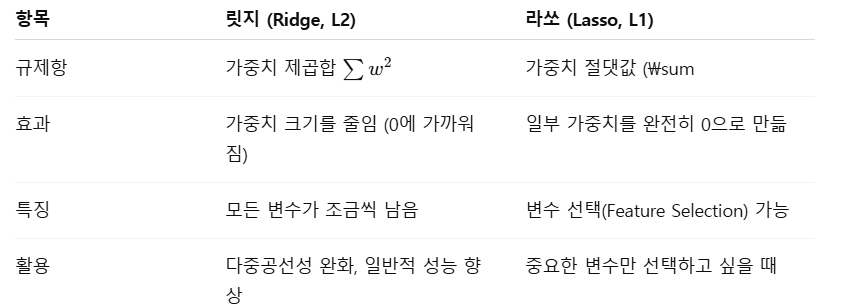

In [30]:
display(Image(filename="img/img32.png", width=800, height=600))

### 릿지 회귀 알아보기
> - 가중치의 제곱을 벌칙으로 사용 <br>
> - 가중치의 제곱을 하므로 큰 가중치를 작게 만들려고 노력함 <br>
> - 선형회귀에 L2규제라는 걸 추가하면 릿지 회귀가 됨

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615392


In [32]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [33]:
# 릿지 클래스에는 얼마나 규제를 많이 줘야 될지를 조절하는 매개 변수 가 alpha 이고 1이 기본
# 적절한 규제 강도 찾기
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

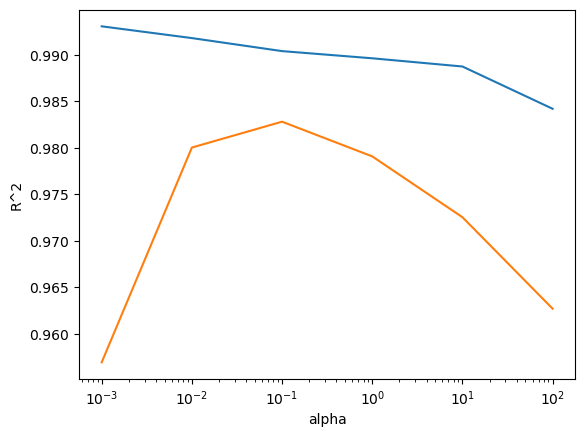

In [34]:
plt.plot(alpha_list, train_score)  # 훈련세트
plt.plot(alpha_list, test_score)   # 테스트 세트
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

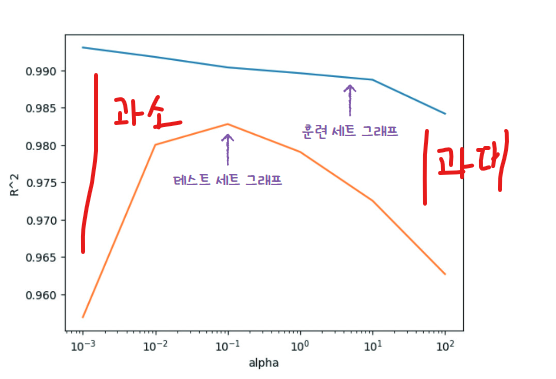

In [35]:
display(Image(filename="img/img33.png", width=800, height=600))

In [36]:
# 위 그래프에 적절한 것은 10-1 이것을 알수 있다
import pandas as pd

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465387017


하이퍼 파라미터 : 모델이 학습되기 전에 사람이 직접 설정해야 하는 값 모델의 복잡도와 일반화 성능에 큰 영향을 줌 잘못 설정하면 과적합(overfitting) 혹은 과소적합(underfitting) 발생 따라서 튜닝(tuning) 과정이 중요함

In [37]:
import pandas as pd

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

# **특성 3개(길이·높이·두께)**로 학습됐는데, 예측할 때 [[50]]처럼 **특성 1개
# new_data = [[50]]    사용 못함  # 새로운 길이 데이터

# 예: 길이=50, 높이=15.0, 두께=6.5 (숫자는 예시)
new_data = [[50.0, 15.0, 6.5]]

# 반드시 "학습에 사용한 것과 같은" poly, ss를 그대로 사용
new_poly   = poly.transform(new_data)
new_scaled = ss.transform(new_poly)
pred = ridge.predict(new_scaled)
print("예상 무게:", float(pred))

예상 무게: 1762.4896231522969


C:\Users\ict\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ict\AppData\Local\Temp\ipykernel_2548\1444167984.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("예상 무게:", float(pred))


In [ ]:
import pandas as pd

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

# **특성 3개(길이·높이·두께)**로 학습됐는데, 예측할 때 [[50]]처럼 **특성 1개
# new_data = [[50]]    사용 못함  # 새로운 길이 데이터

# 예: 길이=50, 높이=15.0, 두께=6.5 (숫자는 예시)
cols_fit = cols_fit = train_input.columns
new_data =  pd.DataFrame([[50.0, 15.0, 6.5]], columns=cols_fit)

# 반드시 "학습에 사용한 것과 같은" poly, ss를 그대로 사용
new_poly   = poly.transform(new_data)
new_scaled = ss.transform(new_poly)
pred = ridge.predict(new_scaled)
print("예상 무게:", pred.item())

예상 무게: 1762.4896231522969


### 라쏘 회귀 알아보기

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [40]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [41]:
train_score = []
test_score = []

# 라쏘 모델도 alpha 매개 변수로 구제의 강조를 조절 할 수 있다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\ict\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ict\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


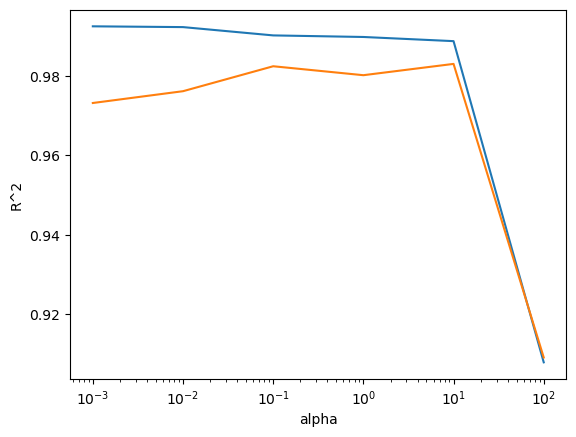

In [42]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

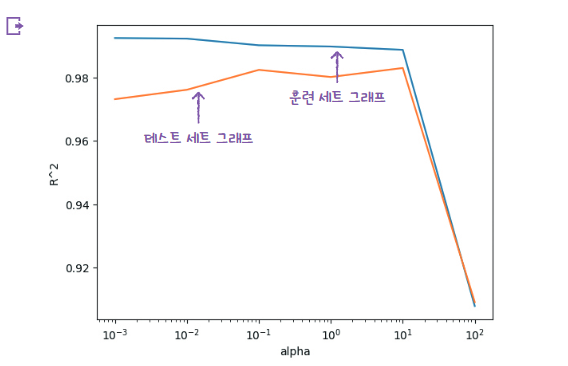

In [43]:
display(Image(filename="img/img34.png", width=800, height=600))

In [44]:
# 위 그림에서   10^1 = 10 이다.
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [45]:
# 라쏘 모델은 계수값을 아예 0으로 만들 수 있다.
# 라쏘 모델의 계수는 coef_ 속성에 저장 되어 있다.
print(np.sum(lasso.coef_ == 0))

# 결과 : 40 =>  전체 특성 중 40개가 라쏘에 의해 중요하지 않다 라고 판단되어 계수가 0으로 떨어진 것을 의미 
#                사용하지 않은 특성이 40개이다. 

40


In [46]:
# 예: 길이=50, 높이=15.0, 두께=6.5 (숫자는 예시)
new_data = [[50.0, 15.0, 6.5]]

# 반드시 "학습에 사용한 것과 같은" poly, ss를 그대로 사용
new_poly   = poly.transform(new_data)
new_scaled = ss.transform(new_poly)
pred = lasso.predict(new_scaled)
print("예상 무게:", float(pred))

예상 무게: 1510.2312461314334


C:\Users\ict\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ict\AppData\Local\Temp\ipykernel_2548\3193853796.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("예상 무게:", float(pred))


#### 랏지 와 라쏘 같이 하기 

In [47]:
# 1. 새 데이터 준비 (길이, 높이, 두께)
new_data = [[50.0, 15.0, 6.5]]

# 2. 다항식 변환 (poly는 학습때 fit된 객체 그대로 사용)
new_poly = poly.transform(new_data)

# 3. 표준화 (ss도 학습때 fit된 객체 그대로 사용)
new_scaled = ss.transform(new_poly)

# 4. 예측 (ridge나 lasso 중 학습한 모델 사용)
ridge_pred = ridge.predict(new_scaled)
lasso_pred = lasso.predict(new_scaled)

print("Ridge 예측 무게:", float(ridge_pred))
print("Lasso 예측 무게:", float(lasso_pred))

Ridge 예측 무게: 1762.4896231522969
Lasso 예측 무게: 1510.2312461314334


C:\Users\ict\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ict\AppData\Local\Temp\ipykernel_2548\619372105.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Ridge 예측 무게:", float(ridge_pred))
C:\Users\ict\AppData\Local\Temp\ipykernel_2548\619372105.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Lasso 예측 무게:", float(lasso_pred))


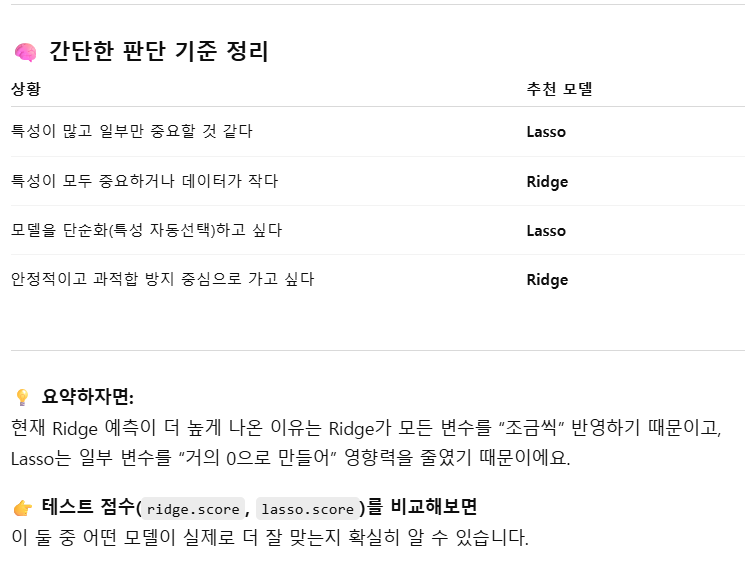

In [48]:
display(Image(filename="img/img37.png", width=800, height=600))

📊 [모델 성능 비교]
Ridge  - train R²: 0.9904, test R²: 0.9828
Lasso  - train R²: 0.9888, test R²: 0.9824

✅ 테스트 기준 더 좋은 모델: Ridge

💡 영향력(계수) 상위 10개 특성:


,Ridge,Lasso
length height,16.998003,55.448564
width^3,41.723229,21.221114
length^2 height,17.759853,43.218595
length height^2,13.348757,47.462545
length width,17.832473,42.231008
length height^4,39.966506,18.146723
height^5,35.392241,15.512730
width^4,45.515449,0.000000
length^2,30.030620,12.148525
width^5,39.442356,0.000000


<Figure size 1000x600 with 0 Axes>

C:\Users\ict\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ict\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ict\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ict\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ict\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

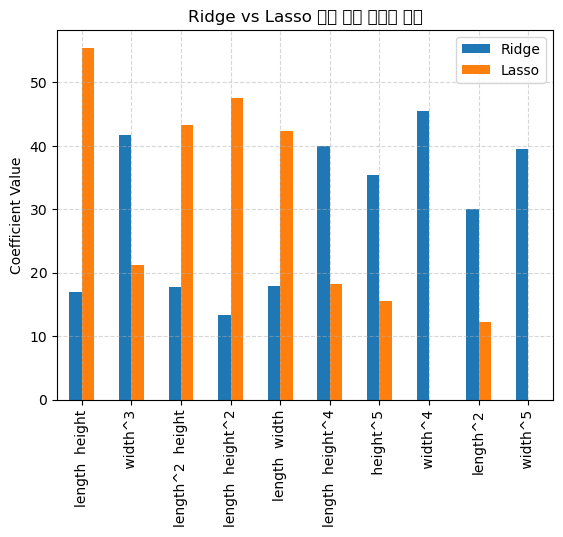

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ridge_train_r2 = ridge.score(train_scaled, train_target)
ridge_test_r2  = ridge.score(test_scaled,  test_target)
lasso_train_r2 = lasso.score(train_scaled, train_target)
lasso_test_r2  = lasso.score(test_scaled,  test_target)

print("📊 [모델 성능 비교]")
print(f"Ridge  - train R²: {ridge_train_r2:.4f}, test R²: {ridge_test_r2:.4f}")
print(f"Lasso  - train R²: {lasso_train_r2:.4f}, test R²: {lasso_test_r2:.4f}")

better_model = "Ridge" if ridge_test_r2 > lasso_test_r2 else "Lasso"
print(f"\n✅ 테스트 기준 더 좋은 모델: {better_model}")

# --- 여기만 수정 ---
feature_names = poly.get_feature_names_out()  # ← 인자 생략 또는 poly.feature_names_in_ 사용

ridge_coef = pd.Series(ridge.coef_, index=feature_names, name='Ridge')
lasso_coef = pd.Series(lasso.coef_, index=feature_names, name='Lasso')

coef_df = pd.concat([ridge_coef, lasso_coef], axis=1)
top_coef = coef_df.reindex(
    coef_df.abs().mean(axis=1).sort_values(ascending=False).head(10).index
)

print("\n💡 영향력(계수) 상위 10개 특성:")
display(top_coef)

plt.figure(figsize=(10,6))
top_coef.plot(kind='bar')
plt.title("Ridge vs Lasso 주요 특성 영향력 비교")
plt.ylabel("Coefficient Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()